In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib import ticker
import seaborn as sns

In [2]:
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']='Malgun Gothic'

In [3]:
# 확보된 데이터에 컬럼외에 입력된 데이터로 읽어지지 않는 경우 skiprows 사용
df =pd.read_csv('csv,xlsx/ta_20211110171434.csv', encoding='cp949')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1908-01-01,108,-5.9,-9.1,-1.3
1,1908-01-02,108,-7.7,-13.9,-3.0
2,1908-01-03,108,-6.2,-10.8,-2.9
3,1908-01-04,108,-7.5,-12.8,-1.7
4,1908-01-05,108,-4.8,-11.3,-0.1


In [4]:
df.shape

(41248, 6)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41248 entries, 0 to 41247
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          41248 non-null  object 
 1   지점          41248 non-null  int64  
 2   평균기온(℃)     40492 non-null  float64
 3   최저기온(℃)     40490 non-null  float64
 4   최고기온(℃)     40489 non-null  float64
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ MB


<AxesSubplot:>

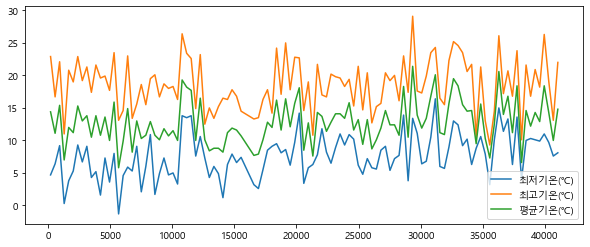

In [5]:
brith = df[df['날짜'].str.contains('-04-20')]
# NaN 행제거
brith =brith[brith['평균기온(℃)'].notnull()]
brith[['최저기온(℃)','최고기온(℃)','평균기온(℃)']].plot(figsize=(10,4))

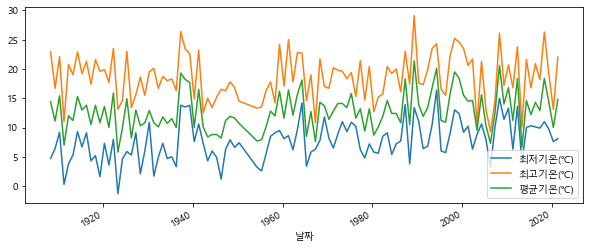

In [6]:
brith.날짜= pd.to_datetime(brith.날짜)
brith.set_index('날짜', inplace=True)

brith[['최저기온(℃)','최고기온(℃)','평균기온(℃)']].plot(figsize=(10,4))
plt.show()

## 지금까지의 최고 기온을 확인
: 2018년 8월 1에 서울의 최고 기온이 39.6도 였다.

- Assumption 1 : 최고기온이 높은 날이 평균기온 높은 날과 같은지 분석  
- Assumption 2 : 평균기온이 높으면 최고기온이 영향을 받는가?  
- Assumption 3 : 최고기온이 높으면 최저기온은 어떤 영향을 가지고 있는가?
- Assumption 4 : 최저기온이 낮으면 최고기온의 영향은 어떤지 분석
- Assumption 5 : 최저기온이 낮으면 최고기온도 낮은가?
- Assumption 6 : 최저기온이 낮으면 평균기온도 낮은가? =>어떤 관계가 있는가? => 관계성 분석

In [14]:
maxtemp=df.iloc[[df['최고기온(℃)'].idxmax()]]
maxtemp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),Unnamed: 5
40051,2018-08-01,108,33.6,27.8,39.6,NaN


In [15]:
midtemp=df.iloc[[df['평균기온(℃)'].idxmax()]]
midtemp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),Unnamed: 5
40052,2018-08-02,108,33.7,30.3,37.9,NaN


In [19]:
df.iloc[[df['최저기온(℃)'].idxmax()]]


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),Unnamed: 5
40052,2018-08-02,108,33.7,30.3,37.9,NaN


In [20]:
df.iloc[[df['최저기온(℃)'].idxmin()]]


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),Unnamed: 5
7396,1927-12-31,108,-15.3,-23.1,-6.4,NaN


## 10년 단위 그룹 ,월, 계절 열(column)을 추가

- Assumption 1 : 10년 단위 기간의 분석을 통해서 데이터를 관찰한결과를 분석하기
- Assumption 2 : 10년 단위 기간의 기온은 어떤 변화를 가지는가?
- Assumption 3 : 10년간 지구온난화 영향으로 기온 변화가 있는가?

In [50]:
df1= df.copy()
df1.날짜 = pd.to_datetime(df1.날짜)
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),Unnamed: 5
0,1907-10-01,108,13.5,7.9,20.7,NaN
1,1907-10-02,108,16.2,7.9,22.0,NaN
2,1907-10-03,108,16.2,13.1,21.3,NaN
3,1907-10-04,108,16.5,11.2,22.0,NaN
4,1907-10-05,108,17.6,10.9,25.4,NaN
...,...,...,...,...,...,...
41243,2021-11-05,108,13.0,7.8,20.2,NaN
41244,2021-11-06,108,14.1,8.8,21.3,NaN
41245,2021-11-07,108,15.3,9.7,21.3,NaN
41246,2021-11-08,108,8.6,4.5,15.5,NaN


In [57]:
df1= df.copy()
df1['년도']=df1['날짜'].str.slice(0,4).astype(int)
df1['그룹']=df1['년도']//10
df1['월']=df1['날짜'].str.slice(5,7).astype(int)
df1['계절'] = (df1['월']//3)&4
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),Unnamed: 5,년도,그룹,월,계절
0,1907-10-01,108,13.5,7.9,20.7,NaN,1907,190,10,0
1,1907-10-02,108,16.2,7.9,22.0,NaN,1907,190,10,0
2,1907-10-03,108,16.2,13.1,21.3,NaN,1907,190,10,0
3,1907-10-04,108,16.5,11.2,22.0,NaN,1907,190,10,0
4,1907-10-05,108,17.6,10.9,25.4,NaN,1907,190,10,0
...,...,...,...,...,...,...,...,...,...,...
41243,2021-11-05,108,13.0,7.8,20.2,NaN,2021,202,11,0
41244,2021-11-06,108,14.1,8.8,21.3,NaN,2021,202,11,0
41245,2021-11-07,108,15.3,9.7,21.3,NaN,2021,202,11,0
41246,2021-11-08,108,8.6,4.5,15.5,NaN,2021,202,11,0


<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='그룹'>

C:\Users\KI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


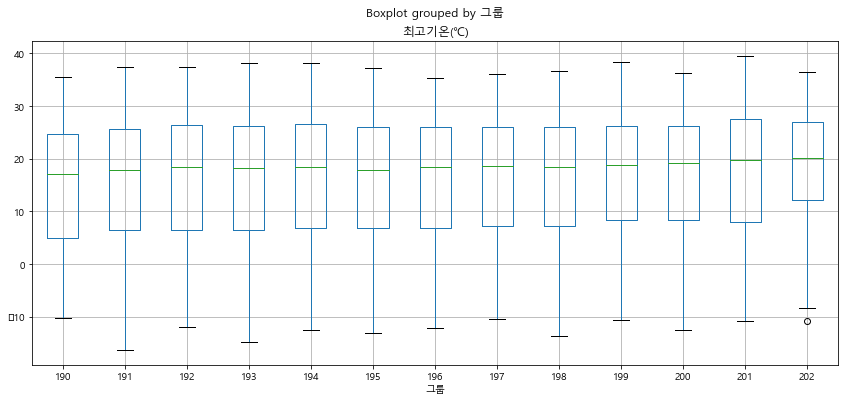

In [67]:
df1.boxplot(column='최고기온(℃)',by='그룹',figsize=(14,6))

In [85]:
df1[['월','계절']].drop_duplicates()

,월,계절
0,1,겨울
31,2,겨울
60,3,겨울
91,4,봄
121,5,봄
152,6,여름
182,7,여름
213,8,여름
244,9,여름
274,10,여름


In [90]:
df1=df.copy()
df1.날짜=pd.to_datetime(df1.날짜)
df1['월']= df1.날짜.dt.month
df1['계절']=pd.cut(df1.월,bins=[0,3,5,10,11,13],labels=['겨울','봄','여름','가을','겨울'],ordered=False)
df1['그룹']=df1.날짜.dt.year//10*10
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월,계절,그룹
0,1908-01-01,108,-5.9,-9.1,-1.3,1,겨울,1900
1,1908-01-02,108,-7.7,-13.9,-3.0,1,겨울,1900
2,1908-01-03,108,-6.2,-10.8,-2.9,1,겨울,1900
3,1908-01-04,108,-7.5,-12.8,-1.7,1,겨울,1900
4,1908-01-05,108,-4.8,-11.3,-0.1,1,겨울,1900
...,...,...,...,...,...,...,...,...
41151,2021-11-05,108,13.0,7.8,20.2,11,가을,2020
41152,2021-11-06,108,14.1,8.8,21.3,11,가을,2020
41153,2021-11-07,108,15.3,9.7,21.3,11,가을,2020
41154,2021-11-08,108,8.6,4.5,15.5,11,가을,2020


<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='그룹'>

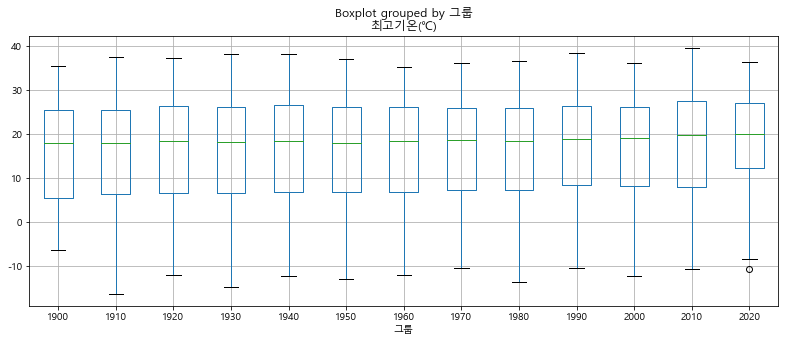

In [15]:
plt.rcParams['axes.unicode_minus']=False
df1.boxplot(column='최고기온(℃)', by='그룹', figsize=(13, 5))

- 분석
1) 1990년 평균적으로 온도가 낮았다. 18도 정도로 관측되었으며 , 2000년,2010년,2020년, 대비 약 1~2편차를 보였다
2) 데이터 분석결과 ,1990년대의 대기상태와 대기오염상태가 상대적으로 덜하고 2000년,2010년은 평균온도가 상승하고 있음을 알수있다.

<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='월'>

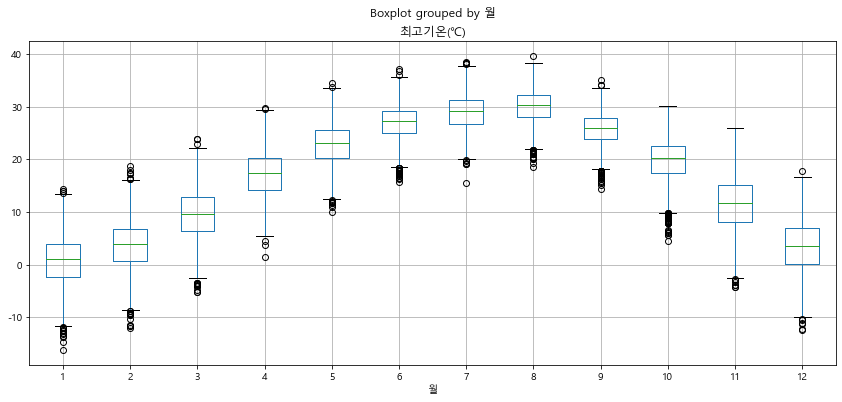

In [17]:
df1.boxplot(column='최고기온(℃)', by='월', figsize=(14, 6))

- 분석결과
##### 1) 월간 기온데이터 분석결과 4월과 12월은 기온의 이상치가 발견되지 않는다.
       - 기온이 상대적으로 안정적으로 관측되고있다.

##### 2) 서울지역은 여름기온의 최고기온의 일정함이 관측되었다.
       - 

In [91]:
df1['일교차']=df1['최고기온(℃)']-df1['최저기온(℃)']
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월,계절,그룹,일교차
0,1908-01-01,108,-5.9,-9.1,-1.3,1,겨울,1900,7.8
1,1908-01-02,108,-7.7,-13.9,-3.0,1,겨울,1900,10.9
2,1908-01-03,108,-6.2,-10.8,-2.9,1,겨울,1900,7.9
3,1908-01-04,108,-7.5,-12.8,-1.7,1,겨울,1900,11.1
4,1908-01-05,108,-4.8,-11.3,-0.1,1,겨울,1900,11.2
...,...,...,...,...,...,...,...,...,...
41151,2021-11-05,108,13.0,7.8,20.2,11,가을,2020,12.4
41152,2021-11-06,108,14.1,8.8,21.3,11,가을,2020,12.5
41153,2021-11-07,108,15.3,9.7,21.3,11,가을,2020,11.6
41154,2021-11-08,108,8.6,4.5,15.5,11,가을,2020,11.0


<AxesSubplot:title={'center':'일교차'}, xlabel='월'>

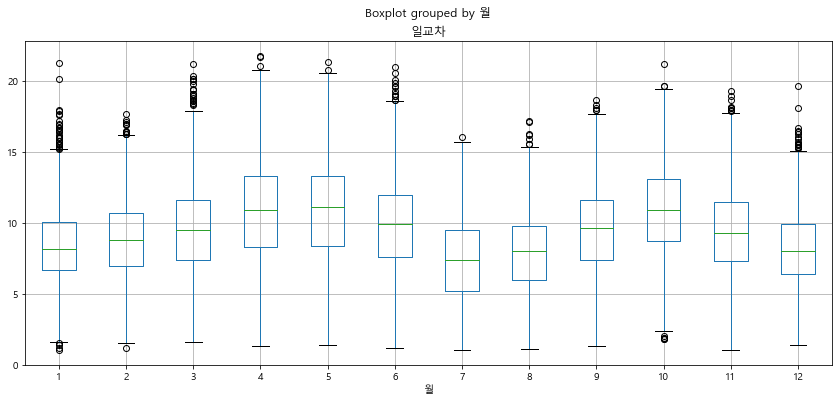

In [92]:
df1.boxplot(column='일교차', by='월', figsize=(14, 6))

In [137]:
rn =pd.read_csv('csv,xlsx/rn_20211111131036.csv', encoding='cp949')
rn.head()

,날짜,지점,강수량(mm)
0,1908-01-01,108,0.0
1,1908-01-02,108,0.0
2,1908-01-03,108,0.0
3,1908-01-04,108,0.0
4,1908-01-05,108,0.0


In [164]:
rn=rn.fillna(0)
rn

,날짜,지점,강수량(mm)
0,1908-01-01,108,0.0
1,1908-01-02,108,0.0
2,1908-01-03,108,0.0
3,1908-01-04,108,0.0
4,1908-01-05,108,0.0
...,...,...,...
41152,2021-11-06,108,0.0
41153,2021-11-07,108,0.0
41154,2021-11-08,108,25.7
41155,2021-11-09,108,2.0


In [138]:
ta =pd.read_csv('csv,xlsx/ta_20211110171434.csv', encoding='cp949')
ta.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1908-01-01,108,-5.9,-9.1,-1.3
1,1908-01-02,108,-7.7,-13.9,-3.0
2,1908-01-03,108,-6.2,-10.8,-2.9
3,1908-01-04,108,-7.5,-12.8,-1.7
4,1908-01-05,108,-4.8,-11.3,-0.1


In [166]:
ta=ta.fillna(0)
ta

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1908-01-01,108,-5.9,-9.1,-1.3
1,1908-01-02,108,-7.7,-13.9,-3.0
2,1908-01-03,108,-6.2,-10.8,-2.9
3,1908-01-04,108,-7.5,-12.8,-1.7
4,1908-01-05,108,-4.8,-11.3,-0.1
...,...,...,...,...,...
41151,2021-11-05,108,13.0,7.8,20.2
41152,2021-11-06,108,14.1,8.8,21.3
41153,2021-11-07,108,15.3,9.7,21.3
41154,2021-11-08,108,8.6,4.5,15.5


In [167]:
tarn=pd.merge(left=ta,right=rn,how='inner',on=['날짜','지점'])
tarn.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,1908-01-01,108,-5.9,-9.1,-1.3,0.0
1,1908-01-02,108,-7.7,-13.9,-3.0,0.0
2,1908-01-03,108,-6.2,-10.8,-2.9,0.0
3,1908-01-04,108,-7.5,-12.8,-1.7,0.0
4,1908-01-05,108,-4.8,-11.3,-0.1,0.0


In [168]:
tarn.drop(columns=['지점'])

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,1908-01-01,-5.9,-9.1,-1.3,0.0
1,1908-01-02,-7.7,-13.9,-3.0,0.0
2,1908-01-03,-6.2,-10.8,-2.9,0.0
3,1908-01-04,-7.5,-12.8,-1.7,0.0
4,1908-01-05,-4.8,-11.3,-0.1,0.0
...,...,...,...,...,...
41151,2021-11-05,13.0,7.8,20.2,0.0
41152,2021-11-06,14.1,8.8,21.3,0.0
41153,2021-11-07,15.3,9.7,21.3,0.0
41154,2021-11-08,8.6,4.5,15.5,25.7


In [169]:
tarn['일교차']=tarn['최고기온(℃)']-tarn['최저기온(℃)']
tarn

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),일교차
0,1908-01-01,108,-5.9,-9.1,-1.3,0.0,7.8
1,1908-01-02,108,-7.7,-13.9,-3.0,0.0,10.9
2,1908-01-03,108,-6.2,-10.8,-2.9,0.0,7.9
3,1908-01-04,108,-7.5,-12.8,-1.7,0.0,11.1
4,1908-01-05,108,-4.8,-11.3,-0.1,0.0,11.2
...,...,...,...,...,...,...,...
41151,2021-11-05,108,13.0,7.8,20.2,0.0,12.4
41152,2021-11-06,108,14.1,8.8,21.3,0.0,12.5
41153,2021-11-07,108,15.3,9.7,21.3,0.0,11.6
41154,2021-11-08,108,8.6,4.5,15.5,25.7,11.0


In [170]:
tarn1=tarn.copy()
tarn1.날짜=pd.to_datetime(tarn1.날짜)
tarn1['월']= tarn1.날짜.dt.month
tarn1['계절']=pd.cut(tarn1.월,bins=[0,3,5,10,11,13],labels=['겨울','봄','여름','가을','겨울'],ordered=False)
tarn1['그룹']=tarn1.날짜.dt.year//10*10
tarn1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),일교차,월,계절,그룹
0,1908-01-01,108,-5.9,-9.1,-1.3,0.0,7.8,1,겨울,1900
1,1908-01-02,108,-7.7,-13.9,-3.0,0.0,10.9,1,겨울,1900
2,1908-01-03,108,-6.2,-10.8,-2.9,0.0,7.9,1,겨울,1900
3,1908-01-04,108,-7.5,-12.8,-1.7,0.0,11.1,1,겨울,1900
4,1908-01-05,108,-4.8,-11.3,-0.1,0.0,11.2,1,겨울,1900
...,...,...,...,...,...,...,...,...,...,...
41151,2021-11-05,108,13.0,7.8,20.2,0.0,12.4,11,가을,2020
41152,2021-11-06,108,14.1,8.8,21.3,0.0,12.5,11,가을,2020
41153,2021-11-07,108,15.3,9.7,21.3,0.0,11.6,11,가을,2020
41154,2021-11-08,108,8.6,4.5,15.5,25.7,11.0,11,가을,2020


In [172]:
tarn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41156 entries, 0 to 41155
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       41156 non-null  datetime64[ns]
 1   지점       41156 non-null  int64         
 2   평균기온(℃)  41156 non-null  float64       
 3   최저기온(℃)  41156 non-null  float64       
 4   최고기온(℃)  41156 non-null  float64       
 5   강수량(mm)  41156 non-null  float64       
 6   일교차      41156 non-null  float64       
 7   월        41156 non-null  int64         
 8   계절       41156 non-null  category      
 9   그룹       41156 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(5), int64(3)
memory usage: 3.2 MB


In [173]:
tarn1.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),일교차,월,계절,그룹
0,1908-01-01,108,-5.9,-9.1,-1.3,0.0,7.8,1,겨울,1900
1,1908-01-02,108,-7.7,-13.9,-3.0,0.0,10.9,1,겨울,1900
2,1908-01-03,108,-6.2,-10.8,-2.9,0.0,7.9,1,겨울,1900
3,1908-01-04,108,-7.5,-12.8,-1.7,0.0,11.1,1,겨울,1900
4,1908-01-05,108,-4.8,-11.3,-0.1,0.0,11.2,1,겨울,1900


<AxesSubplot:xlabel='일교차', ylabel='강수량(mm)'>

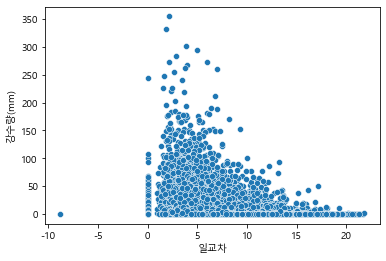

In [171]:
sns.scatterplot(x=tarn1['일교차'],y=tarn1['강수량(mm)'])

<AxesSubplot:xlabel='월', ylabel='강수량(mm)'>

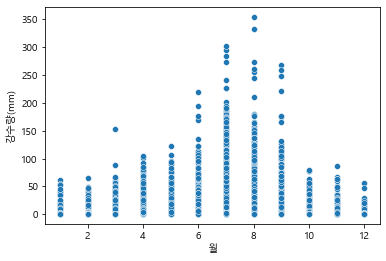

In [174]:
sns.scatterplot(x=tarn1['월'],y=tarn1['강수량(mm)'])

<AxesSubplot:xlabel='계절', ylabel='강수량(mm)'>

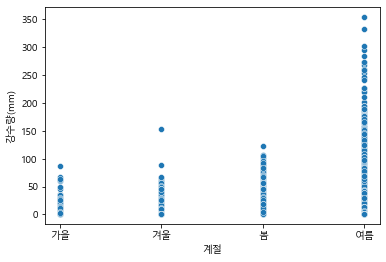

In [175]:
sns.scatterplot(x=tarn1['계절'],y=tarn1['강수량(mm)'])

<AxesSubplot:xlabel='평균기온(℃)', ylabel='강수량(mm)'>

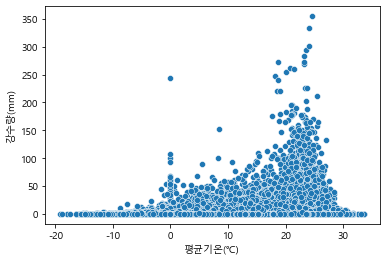

In [176]:
sns.scatterplot(x=tarn1['평균기온(℃)'],y=tarn1['강수량(mm)'])

<AxesSubplot:xlabel='평균기온(℃)', ylabel='강수량(mm)'>

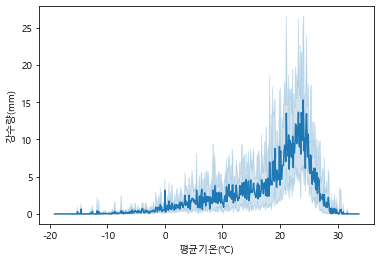

In [178]:
sns.lineplot(x=tarn1['평균기온(℃)'],y=tarn1['강수량(mm)'],ci=100)

- 온도가 높아질수록 강수량은 늘어나지만 30도 근처갈시에는 떨어진다

<AxesSubplot:xlabel='평균기온(℃)', ylabel='강수량(mm)'>

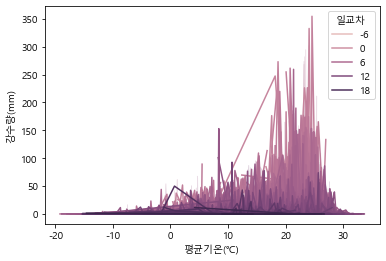

In [181]:
sns.lineplot(x=tarn1['평균기온(℃)'],y=tarn1['강수량(mm)'],hue=tarn1['일교차'])

<AxesSubplot:xlabel='일교차', ylabel='강수량(mm)'>

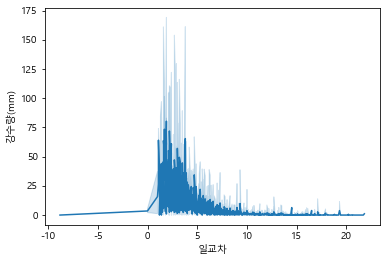

In [183]:
sns.lineplot(x=tarn1['일교차'],y=tarn1['강수량(mm)'],ci=100)
# 일교차가 적을수록 강수량이 늘어남

<AxesSubplot:xlabel='일교차', ylabel='강수량(mm)'>

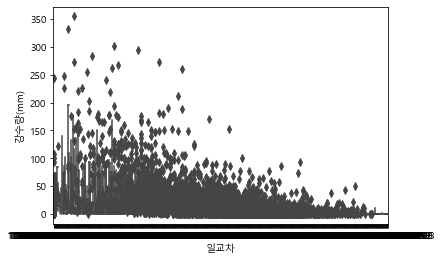

In [185]:
sns.boxplot(x=tarn1['일교차'],y=tarn1['강수량(mm)'])